# RAVDESS and SAVEE Datasets Analysis

## Libraries Import

In [1]:
import os

import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns

## Configuration

In [2]:
DATASET_FOLDER = "datasets/ravdess_savee/"
RAVDESS_ID = "RAVDESS"
SAVEE_ID = "SAVEE"
COLUMNS = ["full_path", "parent_dataset", "sex", "emotion"]
ROWS_TO_DISPLAY = 5

## Datasets Concatenation

In [3]:
def process_file(dataset: str, file_id: str) -> tuple:
    sex = None
    emotion = None

    if (dataset == RAVDESS_ID):
        details = file_id.split("-")

        # Get the sex
        sex_id = int(details[-1])
        if (sex_id % 2 == 0):
            sex = "female"
        else:
            sex = "male"

        # Get the emotion
        emotion_id = int(details[2])
        if (emotion_id == 2):
            emotion = "calm"
        elif (emotion_id == 3):
            emotion = "happy"
        elif (emotion_id == 4):
            emotion = "sad"
        elif (emotion_id == 5):
            emotion = "angry"
        elif (emotion_id == 3):
            emotion = "fearful"
    elif (dataset == SAVEE_ID):
        sex = "male"

        # Get the emotion
        if file_id.startswith("h"):
            emotion = "happy"
        elif file_id.startswith("sa"):
            emotion = "sad"
        elif file_id.startswith("a"):
            emotion = "angry"
        elif file_id.startswith("f"):
            emotion = "fearful"

    return (sex, emotion) if emotion is not None else None


In [4]:
data = []
for subdir, dirs, files in os.walk(DATASET_FOLDER):
    for current_filename in files:
        # Get the file features
        full_path = os.path.join(subdir, current_filename)
        parent_dataset = full_path.split("/")[2]

        # Get the file basename
        file_id = current_filename.replace(".wav", "")
        result = process_file(parent_dataset, file_id)
        if result:
            sex, emotion = result
        else:
            continue
        data.append([full_path, parent_dataset, sex, emotion])

In [5]:
speech_df = pd.DataFrame(data, columns=COLUMNS)
speech_df["label"] = speech_df["sex"] + "_" + speech_df["emotion"]

In [6]:
speech_df.sample(ROWS_TO_DISPLAY)

,full_path,parent_dataset,sex,emotion,label
183,datasets/ravdess_savee/SAVEE/DC/f01.wav,SAVEE,male,fearful,male_fearful
284,datasets/ravdess_savee/RAVDESS/Actor_21/03-01-...,RAVDESS,male,happy,male_happy
618,datasets/ravdess_savee/RAVDESS/Actor_13/03-01-...,RAVDESS,male,happy,male_happy
195,datasets/ravdess_savee/SAVEE/DC/a11.wav,SAVEE,male,angry,male_angry
760,datasets/ravdess_savee/RAVDESS/Actor_12/03-01-...,RAVDESS,female,happy,female_happy


## Dataset Analysis

In [7]:
print("Total number of samples in dataset is {}.".format(len(speech_df)))

Total number of samples in dataset is 1008.


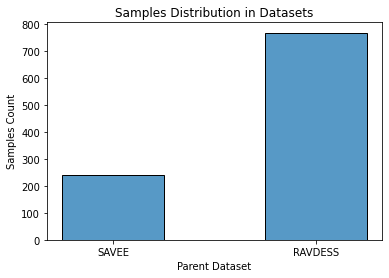

In [8]:
plot = sns.histplot(data=speech_df, x="parent_dataset", shrink=0.5)
plot.set_xlabel("Parent Dataset")
plot.set_ylabel("Samples Count")
plot.set_title("Samples Distribution in Datasets")
pyplot.show()

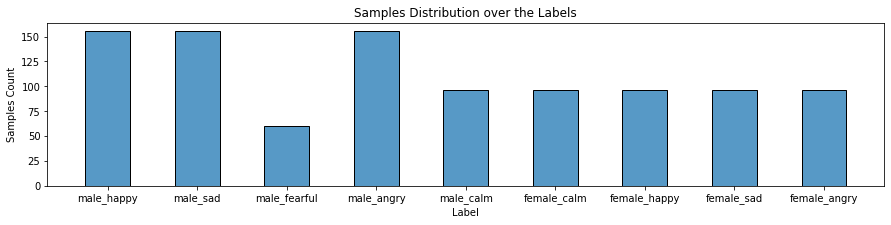

In [9]:
pyplot.rcParams["figure.figsize"] = (15, 3)

plot = sns.histplot(data=speech_df, x="label", multiple="dodge", shrink=0.5)
plot.set_xlabel("Label")
plot.set_ylabel("Samples Count")
plot.set_title("Samples Distribution over the Labels")
pyplot.show()